In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

In [2]:
df=pd.read_csv("audi.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.shape

(10668, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
obj_col=[fea for fea in df.columns if df[fea].dtype=="object"]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
for col in obj_col:
    df[col]=le.fit_transform(df[col])
    

In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

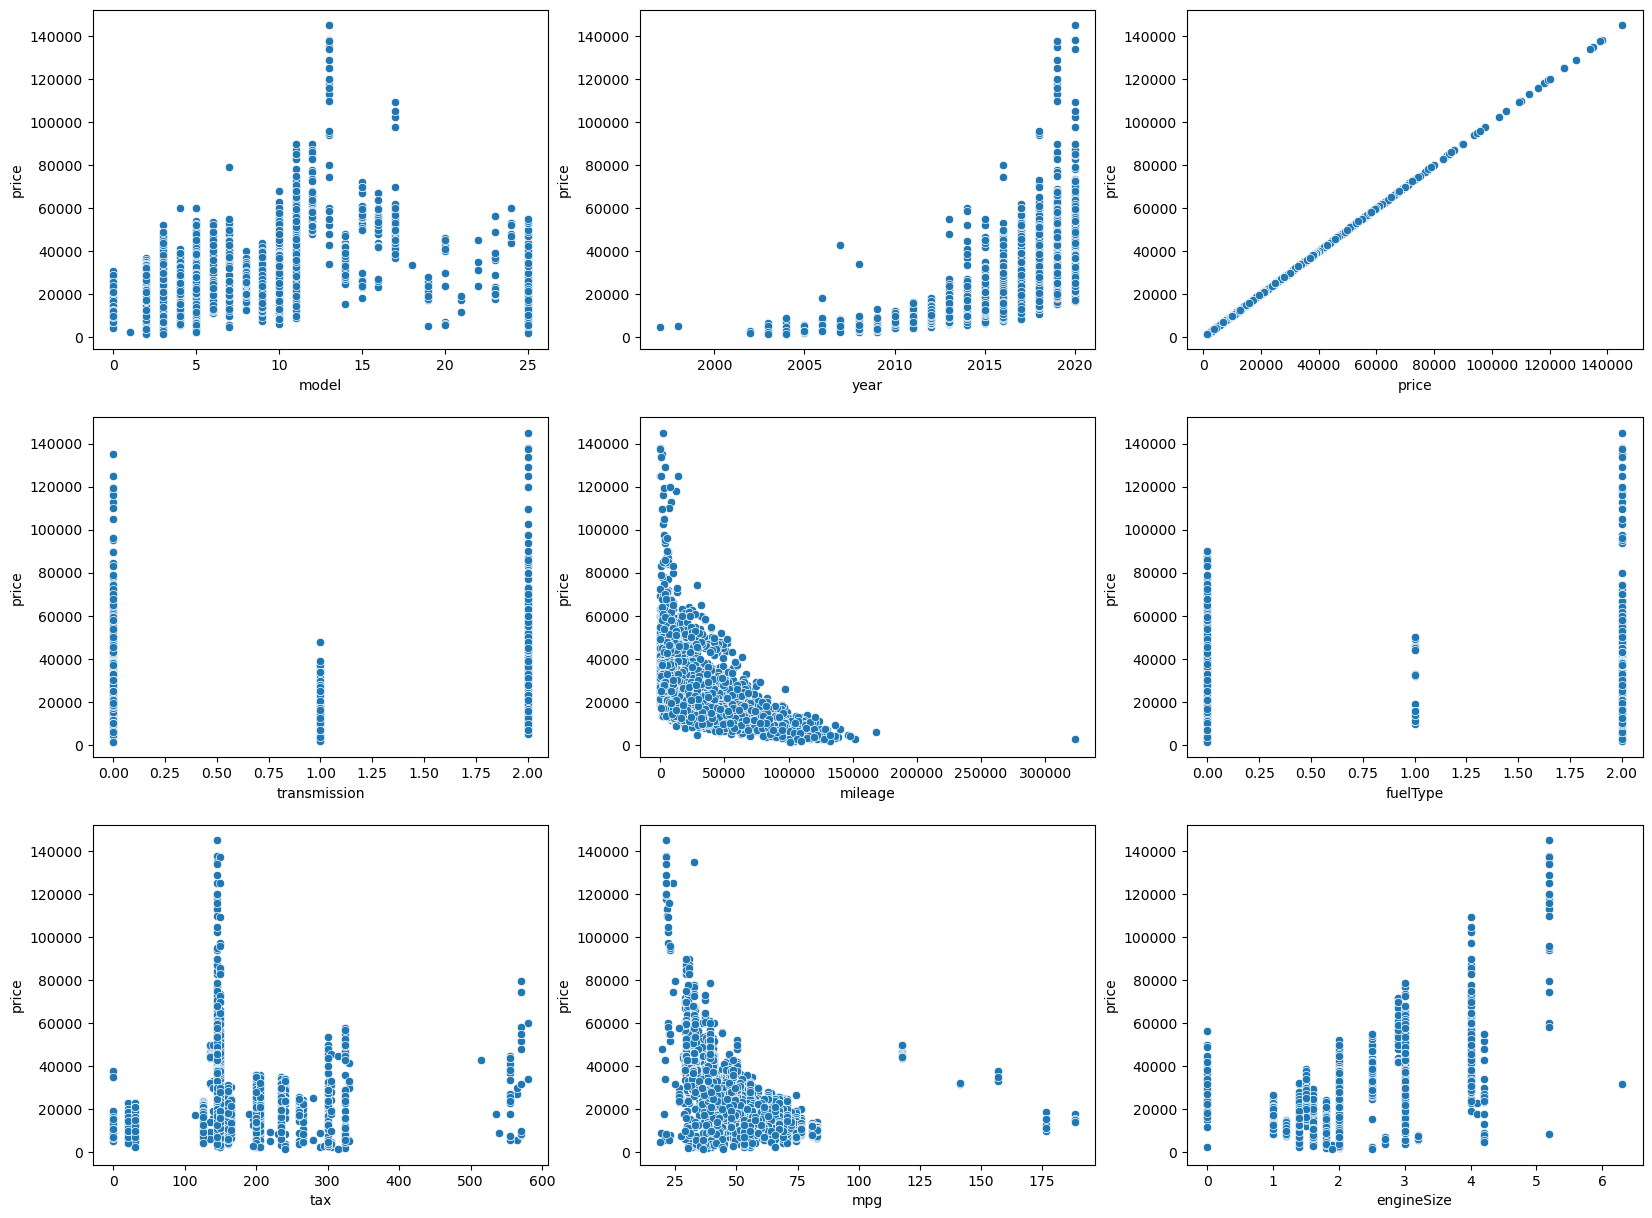

In [9]:
plt.figure(figsize=(20,15))
ptl=1;
for col in df.columns:
    plt.subplot(3,3,ptl)
    sns.scatterplot(x=df[col],y=df["price"])
    ptl+=1;

In [10]:
y=df["price"]

In [11]:
x=df.drop("price",axis=1)

In [12]:
x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,1,15735,2,150,55.4,1.4
1,5,2016,0,36203,0,20,64.2,2.0
2,0,2016,1,29946,2,30,55.4,1.4
3,3,2017,0,25952,0,145,67.3,2.0
4,2,2019,1,1998,2,145,49.6,1.0


<Axes: >

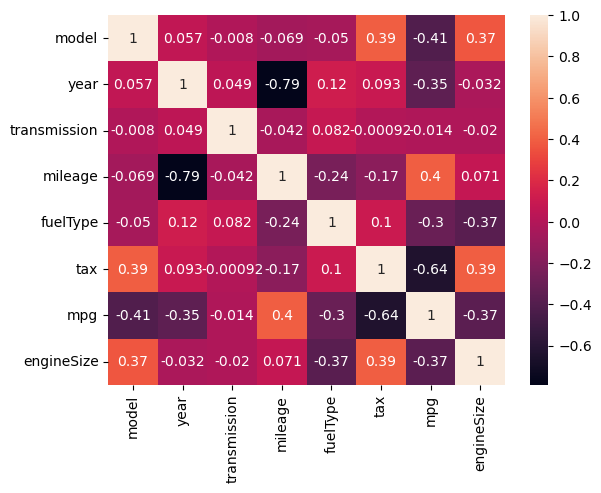

In [13]:
sns.heatmap(x.corr(),annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
features = ['mileage','year','mpg','tax','engineSize']
std=StandardScaler();
sc=std.fit_transform(x[features])
pca=PCA()
x_pca=pca.fit_transform(sc)

In [19]:
x_pca.shape

(10668, 5)

In [27]:
col_names=[f"pc{i+1}" for i in range( x_pca.shape[1])]

In [28]:
col_names

['pc1', 'pc2', 'pc3', 'pc4', 'pc5']

In [32]:
pcs=pd.DataFrame(x_pca,columns=col_names);

In [42]:
pca.explained_variance_ratio_

array([0.46259565, 0.30993605, 0.12400512, 0.06310454, 0.04035864])

Plotting the scree plot

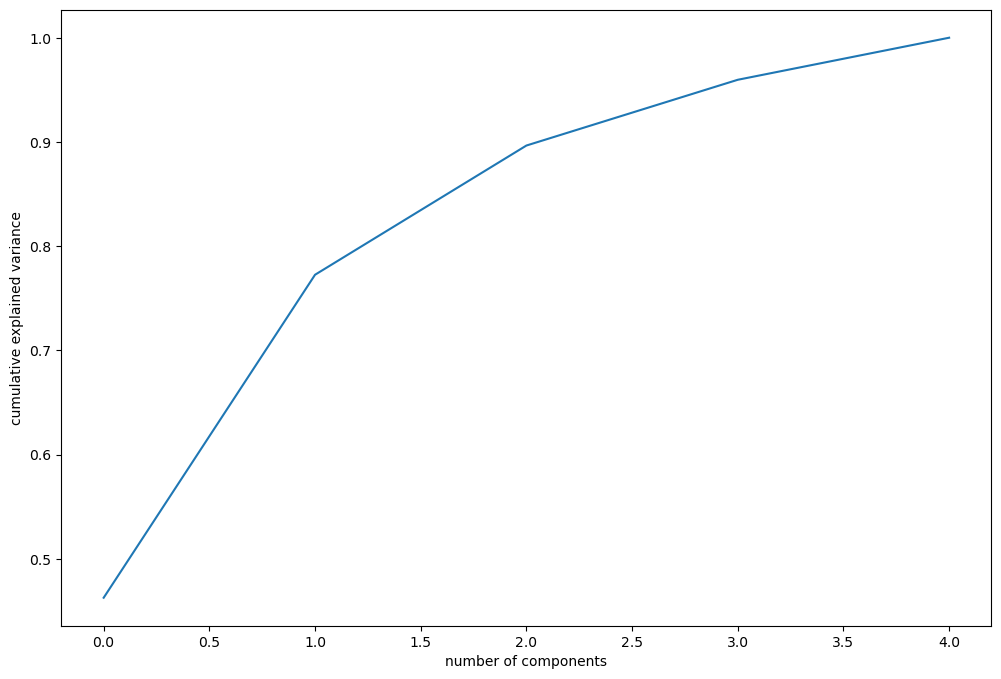

In [43]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

from above scree plot information explain by 4 components